<a href="https://colab.research.google.com/github/abbyWoot/AML/blob/master/AML_Project6_Clustering_FasionMnist_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project6_Clustering**

###**Team 2: Joe, Getong, Abby**

### **Second Dataset: Fashion MNIST** 

In [0]:
#Set Up. 
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


**1) load the Fashion-MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).** 

In [2]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()
print(f"Length of the X_train: {X_train.shape}, Length of y_train is: {y_train.shape}")
print(f"Length of the X_test:{X_test.shape}, Length of y_test is{y_test.shape}")

4423680/4422102 [==============================] - 0s 0us/step
Length of the X_train: (60000, 28, 28), Length of y_train is: (60000,)
Length of the X_test:(10000, 28, 28), Length of y_test is(10000,)


tf.keras.datasets.fashion_mnist.load_data() returns 2 tuples:

1, x_train, x_test: Numpy array of image data(number_samples, 28, 28).

2, y_train, y_test: Numpy array of category labels (integers in range 0-9): (num_samples, )..

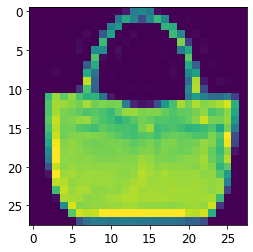

In [57]:
#playing
plt.figure(10)
img = plt.imshow(X_train[100])

In [0]:
#Convert the X_train and X_test data into 2d array:
nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny))

## K-Means
**2) Cluster the images using K-Means and plot the elbow graph to show the best K.**

### **Inertia**
To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric. Inertia is the sum of the squared distances between each training instance and its closest centroid:

In [0]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(d2_X_train)
                for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [11]:
inertias

[266145742269.8958,
 210227913258.5017,
 179902121080.95123,
 162902317417.76633,
 152978184720.74774,
 143226836111.02786,
 136511763616.59668,
 131850619826.63737,
 127657799088.01968,
 123980093641.66411,
 120825767822.00015,
 117713019517.20345,
 115109756672.49347,
 112951416116.64557]

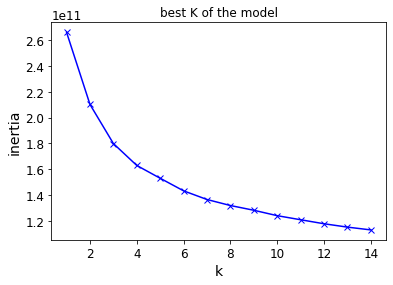

In [0]:
from sklearn.cluster import KMeans
K = range(1, 15)
meandistortions = []
inertia= []
for k in K:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0)
    kmeans.fit(d2_X_train)

    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('best K of the model');

Elbow method says that you can find K where there is an elbow, i.e. before elbow error gradually decreases and after elbow the decrease isn’t significant, as you can see in the graph, inertias goes down significantly as the K goes bigger. But it's hard to tell how much bigger the K needs to go. As the K-means show in the above graph, the inertia is pretty much close to the X-
, we are assuming k = 15 first here.

In [30]:
k = 15
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(d2_X_train)
y_pred

array([ 8, 12,  1, ...,  3,  1, 10], dtype=int32)

In [31]:
y_pred is kmeans.labels_

True

And the following 15 _centroids_ (i.e., cluster centers) were estimated:

In [32]:
kmeans.cluster_centers_

array([[ 3.57786717e-17,  2.56718813e-02,  8.26313678e-02, ...,
         8.92980345e+00,  3.85960690e+00,  5.03008424e-01],
       [ 2.16483686e-03,  4.94819855e-03,  3.15447657e-02, ...,
         8.42121540e-01,  2.48183083e-01,  1.93289006e-02],
       [ 3.79794911e-04,  6.83630839e-03,  2.73452336e-02, ...,
         8.60805165e+00,  3.57424991e+00,  1.68249145e-01],
       ...,
       [ 2.58732212e-03,  1.91461837e-02,  1.49029754e-01, ...,
         7.01164295e-02,  1.39715395e-02,  3.10478655e-03],
       [ 5.18248638e-17,  2.78164117e-04, -7.32053307e-16, ...,
         2.53129346e-02,  3.89429764e-03,  3.89429764e-03],
       [ 1.33049494e-03,  1.49015434e-02,  9.26024481e-02, ...,
         1.48863757e+01,  2.29563598e+00,  1.57264502e-01]])

In [33]:
kmeans.inertia_

111250075327.65587

Inertia is the sum of the squared distances between each training instance and its closest centroid:

In [34]:
X_dist = kmeans.transform(d2_X_train)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

111250075327.65582

###**Silhouette Score**
Silhouette score is the mean silhouette coefficient over all the instances. It is a better measure to decide the number of clusters to be formulated from the data.

In [0]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(d2_X_train, model.labels_)
                     for model in kmeans_per_k[1:]]

In [20]:
silhouette_scores

[0.19292353740440155,
 0.1868631541189012,
 0.18034836892941103,
 0.16157394858536603,
 0.15622240618672606,
 0.16538973599142445,
 0.15433385392127688,
 0.15707003166825867,
 0.15490771631045844,
 0.14176947734258036,
 0.1378153276793143,
 0.13151804043796553,
 0.1303538193753024]

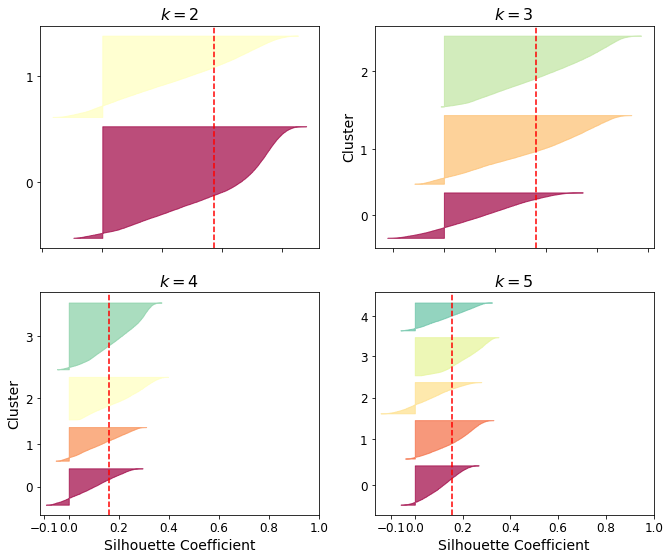

In [29]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 0].labels_
    silhouette_coefficients = silhouette_samples(d2_X_train, y_pred)

    padding = len(d2_X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

# **Train a Classifier**

**3) Train a classifier to determine which object is represented in each image and evaluate it on the validation set.**

### **Random Forest Classifier**


Accuracy Score is 0.8781 without dimensionality reduction

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(d2_X_train, y_train)
clf.score(d2_X_test, y_test)

0.8781

# Using K-mean Clustering as Dismension Reduction for Classification

**4) Use K-Means as a dimensionality reduction tool and train a classifier on the reduced set. Search for the number of clusters that provides the best performance.**

In [47]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=15, random_state=42)),
    ("clf", RandomForestClassifier(n_estimators=150, random_state=42)),
])
pipeline.fit(d2_X_train, y_train)
pipeline.score(d2_X_test, y_test)

0.7839

With cluster = 15, the accuracy actually decreased instead of improving, since this cluter number is arbitary. Here we try to find the best k, when the accuracy score peaks.

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(15, 100, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(d2_X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] kmeans__n_clusters=15 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=15, total= 1.5min
[CV] kmeans__n_clusters=15 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] ............................ kmeans__n_clusters=15, total= 1.5min
[CV] kmeans__n_clusters=15 ...........................................
[CV] ............................ kmeans__n_clusters=15, total= 1.3min
[CV] kmeans__n_clusters=25 ...........................................
[CV] ............................ kmeans__n_clusters=25, total= 2.0min
[CV] kmeans__n_clusters=25 ...........................................
[CV] ............................ kmeans__n_clusters=25, total= 2.0min
[CV] kmeans__n_clusters=25 ...........................................
[CV] ............................ kmeans__n_clusters=25, total= 2.1min
[CV] kmeans__n_clusters=35 ...........................................
[CV] ............................ kmeans__n_clusters=35, total= 2.4min
[CV] kmeans__n_clusters=35 ...........................................
[CV] ............................ kmeans__n_clusters=35, total= 2.5min
[CV] kmeans__n_clusters=35 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 93.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=15, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('rnd_clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gin

In [43]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [44]:
grid_clf.score(d2_X_test, y_test)

0.8138

K,  from 10-100, the best value is 95, the accuracy still lower than the orginial set (reduced from 87.81% to 81.38%. Now we are testing using K-mean (k=95) as a dimension reduction tool.

In [0]:
best_model = KMeans(n_clusters=95, random_state=42).fit(d2_X_train)
X_train_reduced = best_model.transform(d2_X_train)
X_test_reduced = best_model.transform(d2_X_test)

In [51]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_test_reduced, y_test)

0.8112

# Gaussian Mixture Model Test
**5) Train a Gaussian mixture model on each dataset. To speed up the algorithm, use PCA dimensionality reduction (99% variataion).**




Now we'll use t-SNE to reduce dimensionality down to 2 dimension so we can plot the dataset. Current dimension is 784. And use PCA to speeddup the t-SNE. As previous study, we know that the best dimension reduction technique to work with t-SNE is PCA. 

In [0]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [74]:
from sklearn.manifold import TSNE 
from sklearn.pipeline import Pipeline
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.99, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(d2_X_train)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))

PCA+t-SNE took 1919.0s.


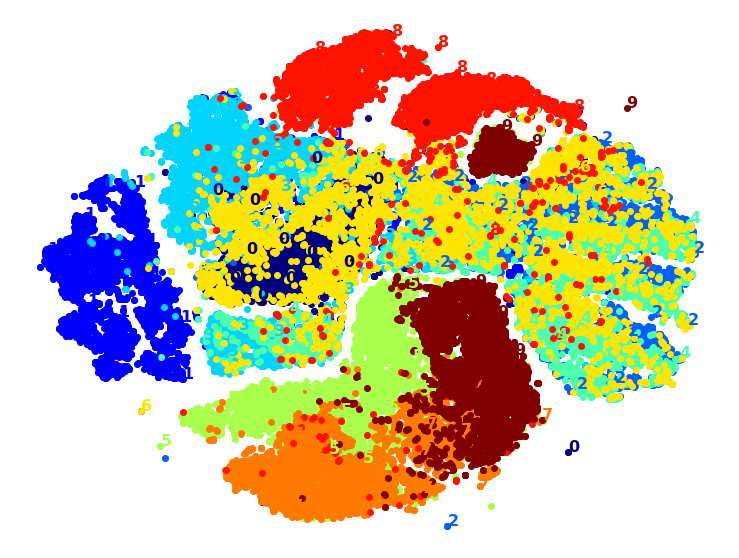

In [75]:
plot_digits(X_pca_tsne_reduced, y_train)
plt.show()

####**Train Gaussian Mixture Model.**
**1, use the PCA & t-SNE reduced data **

In [76]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_pca_tsne_reduced)
gm.means_

array([[ 31.75862494,  15.81733366],
       [-42.17635255,   1.05846369],
       [ -4.27526772, -39.37809547],
       [ 17.91453679, -21.02909121],
       [ -4.56829834,  18.06787714],
       [-38.09813338, -14.5488513 ],
       [-10.83842367,  44.00511602],
       [ 43.1727019 , -19.18143192],
       [-30.82792231,  32.43274247],
       [ 10.28102702,  38.52504929],
       [-11.27178402,   2.3921657 ],
       [ 21.63363361, -31.46548308],
       [ 46.83173212,  11.82230117],
       [-17.10278254, -47.96510235],
       [  7.47607823,   7.60841867],
       [ 20.29849367,  11.32052242],
       [  0.26042886,  -9.32809149],
       [ 12.0987852 , -38.36344761],
       [ 22.14225224,  42.63867654],
       [-19.04834367,  16.73593901],
       [-12.93897323, -33.41295747],
       [-52.16908411,   3.92408426],
       [  2.58758427, -23.77344219],
       [ 21.40097649,  29.26816177],
       [  9.50915057,  19.65967578],
       [-48.97724996, -14.21792724],
       [-26.07060676, -15.7789976 ],
 

In [77]:
gm.weights_

array([0.02563781, 0.01429786, 0.02173165, 0.0254394 , 0.03136597,
       0.01571453, 0.03213259, 0.03282797, 0.03092815, 0.02738807,
       0.03578401, 0.02341818, 0.02821133, 0.02985574, 0.02166419,
       0.0322457 , 0.02197547, 0.02550795, 0.02008737, 0.02596266,
       0.02650886, 0.02792922, 0.02842026, 0.01603377, 0.02353761,
       0.02263096, 0.01850913, 0.025142  , 0.0306688 , 0.02792134,
       0.02362033, 0.020777  , 0.02458294, 0.01624383, 0.02262998,
       0.01883136, 0.01259152, 0.03289951, 0.03549452, 0.02285047])

In [78]:
gm.covariances_

array([[[ 27.10675848,  -8.45486613],
        [ -8.45486613,  30.80468568]],

       [[  7.32589813,  -8.41062085],
        [ -8.41062085,  33.87521107]],

       [[ 21.68664303,   5.99553577],
        [  5.99553577,  24.3387885 ]],

       [[ 18.30344566,   4.82286364],
        [  4.82286364,  25.44696661]],

       [[ 16.93969325,   9.18564581],
        [  9.18564581,  29.97797832]],

       [[  4.90830876,  -4.23208738],
        [ -4.23208738,  35.41837679]],

       [[ 19.37124708,   2.18201572],
        [  2.18201572,  21.96117286]],

       [[ 32.86643575,   9.53445823],
        [  9.53445823,  25.49103339]],

       [[ 18.47305223,   7.63505733],
        [  7.63505733,  33.3671019 ]],

       [[ 13.84010359,   0.25898568],
        [  0.25898568,  18.39547133]],

       [[ 21.71696415,   4.21890264],
        [  4.21890264,  42.17695396]],

       [[ 11.06478091,   5.03958752],
        [  5.03958752,  28.05440858]],

       [[ 24.77483346,  -8.98670384],
        [ -8.98670384,  25

In [79]:
gm.converged_

True

In [80]:
gm.n_iter_

9

**6) Graph results of your experiments for the different data sets and provide a qualitative assessment and detailed discussion of the achieved results.**